## Univariate
## Using F-Score and chi2-Score

## This method is only used for categorical data (i.e. all features as well as targets should be categorical)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
type(titanic)

pandas.core.frame.DataFrame

In [6]:
print(len(titanic.index))

891


In [7]:
print(len(titanic.columns))

15


In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic.drop(labels=['age', 'deck'], inplace=True, axis = 1)
titanic.dropna(inplace=True)
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [10]:
print(len(titanic.columns))

13


In [11]:
print(len(titanic.index))

889


In [12]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
### Selecting only categorical feature and Target

In [14]:
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')


In [15]:
data = titanic[[ 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone' ]]

In [16]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [17]:
print(data.groupby('sex').sex.count())

sex
female    312
male      577
Name: sex, dtype: int64


In [18]:
print(data.groupby('who').who.count())

who
child     83
man      537
woman    269
Name: who, dtype: int64


In [19]:
print(data.groupby('alone').alone.count())

alone
False    354
True     535
Name: alone, dtype: int64


In [20]:
print(data.groupby('embarked').embarked.count())

embarked
C    168
Q     77
S    644
Name: embarked, dtype: int64


In [21]:
a = {'female':0, 'male':1}
b = {'child':0, 'man':1, 'woman':2}
c = {True:1, False:0}
d = {'C':0, 'Q':1, 'S':2}

In [22]:
data['sex'] = data['sex'].map(a)
data['who'] = data['who'].map(b)
data['alone'] = data['alone'].map(c)
data['embarked'] = data['embarked'].map(d)

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [23]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,1,1,0,2,1,0
1,1,0,1,0,0,2,0
2,3,0,0,0,2,2,1
3,1,0,1,0,2,2,0
4,3,1,0,0,2,1,1


In [24]:
X = data
y = titanic['survived']

In [25]:
print(X.shape)
print(y.shape)

(889, 7)
(889,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
f_score = chi2(X_train, y_train)

In [28]:
f_score

(array([25.61688434, 70.60026519,  0.26361308,  5.12723077,  7.28959069,
        22.90453046, 15.27941133]),
 array([4.16380069e-07, 4.37458254e-17, 6.07648716e-01, 2.35532772e-02,
        6.93552756e-03, 1.70250110e-06, 9.27216443e-05]))

In [29]:
p_value = f_score[1]

In [30]:
p_value = pd.Series(p_value, index = X_train.columns)

In [31]:
p_value

pclass      4.163801e-07
sex         4.374583e-17
sibsp       6.076487e-01
parch       2.355328e-02
embarked    6.935528e-03
who         1.702501e-06
alone       9.272164e-05
dtype: float64

In [32]:
p_value.sort_values(ascending=True, inplace=True)

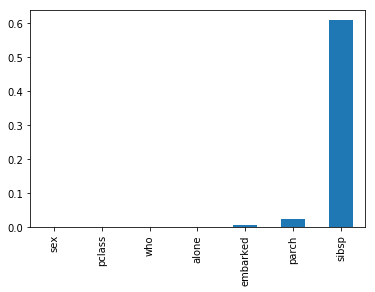

In [33]:
p_value.plot.bar()

In [37]:
X_train_3 = X_train[['sex', 'pclass', 'alone', 'who']]
X_test_3 = X_test[['sex', 'pclass', 'alone', 'who']]

In [38]:
%%time
model = RandomForestClassifier(n_estimators=1000, max_depth=4)
model.fit(X_train_3, y_train)
y_pred = model.predict(X_test_3)
print(accuracy_score(y_test, y_pred))

0.8161434977578476
Wall time: 1.01 s


In [36]:
%%time
model = RandomForestClassifier(n_estimators=1000, max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8161434977578476
Wall time: 1 s
